In [3]:
import pandas as pd 
import numpy as np 
import matplotlib as plt 
%matplotlib inline

In [4]:
df = pd.read_csv('quikr_car.csv')

In [5]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [6]:
df.shape

(892, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [16]:
df['name'].unique()

array(['Hyundai Santro Xing XO eRLX Euro III', 'Mahindra Jeep CL550 MDI',
       'Maruti Suzuki Alto 800 Vxi',
       'Hyundai Grand i10 Magna 1.2 Kappa VTVT',
       'Ford EcoSport Titanium 1.5L TDCi', 'Ford Figo', 'Hyundai Eon',
       'Ford EcoSport Ambiente 1.5L TDCi',
       'Maruti Suzuki Alto K10 VXi AMT', 'Skoda Fabia Classic 1.2 MPI',
       'Maruti Suzuki Stingray VXi', 'Hyundai Elite i20 Magna 1.2',
       'Mahindra Scorpio SLE BS IV', 'Audi A8', 'Audi Q7',
       'Mahindra Scorpio S10', 'Maruti Suzuki Alto 800',
       'Hyundai i20 Sportz 1.2', 'Maruti Suzuki Alto 800 Lx',
       'Maruti Suzuki Vitara Brezza ZDi', 'Maruti Suzuki Alto LX',
       'Mahindra Bolero DI', 'Maruti Suzuki Swift Dzire ZDi',
       'Mahindra Scorpio S10 4WD', 'Maruti Suzuki Swift Vdi BSIII',
       'Maruti Suzuki Wagon R VXi BS III',
       'Maruti Suzuki Wagon R VXi Minor',
       'Toyota Innova 2.0 G 8 STR BS IV', 'Renault Lodgy 85 PS RXL',
       'Skoda Yeti Ambition 2.0 TDI CR 4x2',
       'Maru

# Quality 
- year has many non integer Junk data non year format 
- Price Ask for price need to remove and Object to integer conversion 
- kms_driven  object to integer and has nan values and remove kms 
- fuel_type has nan
- we will keep 1st 3 words of name 

# cleaning

In [49]:
#backup of data 
car=df

In [50]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


- year has many non integer Junk data non year format 

In [51]:
car=car[car['year'].str.isnumeric()]

In [52]:
car.shape

(842, 6)

In [53]:
car['year'].astype(int)

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
886    2009
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 842, dtype: int32

In [54]:
car['year']=car['year'].astype(int)

C:\Users\abhis\AppData\Local\Temp\ipykernel_27444\152728128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['year']=car['year'].astype(int)


In [55]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.8+ KB


- Price Ask for price need to remove and Object to integer conversion

In [56]:
car=car.query('Price!="Ask For Price"')

In [57]:
car.shape

(819, 6)

In [58]:
car['Price']=car['Price'].str.replace(',',"").astype(int)

In [59]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


- kms_driven  object to integer and has nan values and remove kms 

In [60]:
car['kms_driven']=car['kms_driven'].str.split(' ').str.get(0).str.replace(",","")

In [62]:
car=car[car['kms_driven'].str.isnumeric()]

In [68]:
car['kms_driven']=car['kms_driven'].astype(int)

In [69]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


- fuel_type has nan

In [70]:
car['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [74]:
car=car[~car['fuel_type'].isna()]

In [75]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


- we will keep 1st 3 words of name 

In [79]:
car['name'].str.split(' ').str.slice(0,3).str.join(" ")

0         Hyundai Santro Xing
1         Mahindra Jeep CL550
3           Hyundai Grand i10
4      Ford EcoSport Titanium
6                   Ford Figo
                ...          
883        Maruti Suzuki Ritz
885            Tata Indica V2
886      Toyota Corolla Altis
888              Tata Zest XM
889        Mahindra Quanto C8
Name: name, Length: 816, dtype: object

In [80]:
car['name']=car['name'].str.split(' ').str.slice(0,3).str.join(" ")

C:\Users\abhis\AppData\Local\Temp\ipykernel_27444\538615731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['name']=car['name'].str.split(' ').str.slice(0,3).str.join(" ")


In [81]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [87]:
car=car.reset_index(drop=True)

In [88]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [97]:
car.describe().T

,count,mean,std,min,25%,50%,75%,max
year,815.0,2012.442945,4.005079,1995.0,2010.0,2013.0,2015.0,2019.0
Price,815.0,401793.338650,381588.817401,30000.0,175000.0,299999.0,490000.0,3100000.0
kms_driven,815.0,46277.096933,34318.459638,0.0,27000.0,41000.0,56879.0,400000.0


In [98]:
import seaborn as sns

<Axes: >

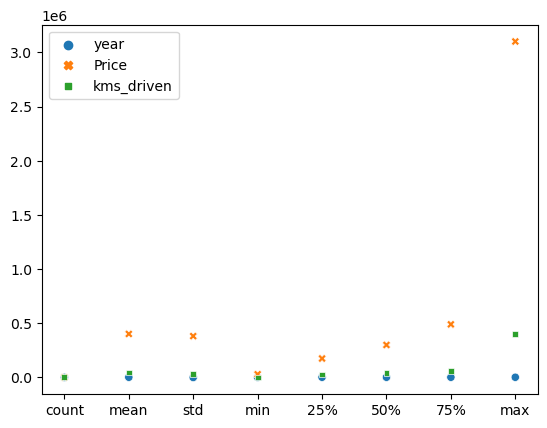

In [100]:
sns.scatterplot(car.describe())

In [94]:
car=car.query('Price<6000003').reset_index(drop=True)

In [95]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [101]:
car.to_csv('cleaned_car.csv')

# Model 

In [103]:
X= car.drop(columns='Price')
y= car['Price']

In [104]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
811,Tata Indica V2,Tata,2009,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,132000,Petrol
813,Tata Zest XM,Tata,2018,27000,Diesel


In [105]:
y

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
810    270000
811    110000
812    300000
813    260000
814    390000
Name: Price, Length: 815, dtype: int32

In [225]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [297]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [299]:
## divide numertical and categorical 
categorical_attributes=X_train.select_dtypes(['object']).columns 
numerical_attibutes=X_train.select_dtypes(['int','float']).columns

In [300]:
categorical_attributes

Index(['name', 'company', 'fuel_type'], dtype='object')

In [301]:
numerical_attibutes

Index(['year', 'kms_driven'], dtype='object')

In [302]:
ct = ColumnTransformer([
    ("OneHotEncoder",OneHotEncoder(handle_unknown='ignore'),categorical_attributes),
    ("MinMaxScaler",MinMaxScaler(),numerical_attibutes)
])

In [213]:
'''X_train=ct.fit_transform(X_train)
X_test=ct.transform(X_test)'''

In [243]:
X_train.shape

(570, 5)

In [244]:
X_test.shape

(245, 5)

In [228]:
lr=LinearRegression()

In [229]:
pipe=make_pipeline(ct,lr)

In [230]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['name', 'company', 'fuel_type'], dtype='object')),
                                                 ('StandarScaling',
                                                  StandardScaler(),
                                                  Index(['year', 'kms_driven'], dtype='object'))])),
                ('linearregression', LinearRegression())])

In [231]:
ypred=pipe.predict(X_test)

In [233]:
r2_score(y_test,ypred)

0.7045701301431113

In [234]:
mae=mean_absolute_error(y_test,ypred)
mse=mean_squared_error(y_test,ypred)
rmse=np.sqrt(mse)
print(f"mse::{mse}")
print(f"mae::{mae}")
print(f"rmse::{rmse}")

mse::33911382497.1496
mae::102002.17310794852
rmse::184150.43442020332


In [235]:
car.head(5)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [215]:
import pickle

In [216]:
pickle.dump(lr,open('Linearregression.pkl','wb'))

In [242]:
#### Prediction of New Data 
pipe.predict(pd.DataFrame([['Hyundai Santro Xing','Hyundai',2006,1900,'Petrol']],columns=['name','company','year','kms_driven','fuel_type']))

array([94976.57570136])

In [245]:
# Lasso regression:-
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso= Lasso()

params = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,15,20]}

lasso_reg = GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=10)

In [246]:
pipelasso=make_pipeline(ct,lasso_reg)

In [247]:
pipelasso.fit(X_train,y_train)

C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1715926821083.5793, tolerance: 8495773945.287415
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1923141976195.0442, tolerance: 7398654750.381772
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1896611688587.5989, tolerance: 7595864188.1226225
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.

C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1148131208054.7698, tolerance: 7648958137.091307
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1068380926694.0134, tolerance: 8367581411.466824
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 875619736623.2837, tolerance: 8495773945.287415
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py

C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 342260695968.3235, tolerance: 8447793906.629336
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 430466354076.3357, tolerance: 8682927725.594032
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 454967032379.501, tolerance: 7648958137.091307
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:59

C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116172227133.49658, tolerance: 8454872534.760688
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119840029034.45703, tolerance: 8447793906.629336
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23820742442.311035, tolerance: 7648958137.091307
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.p

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['name', 'company', 'fuel_type'], dtype='object')),
                                                 ('StandarScaling',
                                                  StandardScaler(),
                                                  Index(['year', 'kms_driven'], dtype='object'))])),
                ('gridsearchcv',
                 GridSearchCV(cv=10, estimator=Lasso(),
                              param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001,
                                                    0.01, 1, 5, 10, 15, 20]},
                              scoring='neg_mean_squared_error'))])

In [249]:
ypred=pipelasso.predict(X_test)

In [250]:
r2_score(y_test,ypred)

0.6938473244573542

In [251]:
#### Prediction of New Data 
pipelasso.predict(pd.DataFrame([['Hyundai Santro Xing','Hyundai',2006,1900,'Petrol']],columns=['name','company','year','kms_driven','fuel_type']))

array([96596.21130127])

In [265]:
from sklearn.ensemble import RandomForestRegressor
Rf=RandomForestRegressor()

In [266]:
piperfr=make_pipeline(ct,Rf)

In [267]:
piperfr.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['name', 'company', 'fuel_type'], dtype='object')),
                                                 ('StandarScaling',
                                                  StandardScaler(),
                                                  Index(['year', 'kms_driven'], dtype='object'))])),
                ('randomforestregressor', RandomForestRegressor())])

In [268]:
ypredrf=piperfr.predict(X_test)

In [331]:
r2_score(y_test,ypredrf)

TypeError: 'list' object is not callable

In [270]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=4)

In [271]:
pipedt=make_pipeline(ct,dt)

In [272]:
pipedt.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['name', 'company', 'fuel_type'], dtype='object')),
                                                 ('StandarScaling',
                                                  StandardScaler(),
                                                  Index(['year', 'kms_driven'], dtype='object'))])),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=4))])

In [273]:
ypreddt=pipedt.predict(X_test)

In [274]:
r2_score(y_test,ypreddt)

0.2816545256274974

In [275]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRFRegressor

In [304]:
svc =SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsRegressor()
mnb=MultinomialNB()
dtc=DecisionTreeRegressor(max_depth=5)
lrc=LinearRegression()
rfc=RandomForestRegressor(n_estimators=50,random_state=2)
abc=AdaBoostRegressor(n_estimators=50,random_state=2)
bc=BaggingRegressor(n_estimators=50,random_state=2)
etc=ExtraTreesRegressor(n_estimators=50,random_state=2)
gbdt=GradientBoostingRegressor(n_estimators=50,random_state=2)
xgb=XGBRFRegressor(n_estimators=50,random_state=2)

In [305]:
###make pipelines###
pipesvr= make_pipeline(ct,svc)
pipeknr= make_pipeline(ct,knc)
pipemnb= make_pipeline(ct,mnb)
pipedtr= make_pipeline(ct,dtc)
pipelrr= make_pipeline(ct,lrc)
piperfr= make_pipeline(ct,abc)
pipeabr= make_pipeline(ct,knc)
pipebr= make_pipeline(ct,bc)
pipeetr= make_pipeline(ct,etc)
pipegbdr= make_pipeline(ct,gbdt)
pipexgbr= make_pipeline(ct,xgb)

In [346]:
def train_pipes_regressor(model,X_train,y_train,X_test,y_test):
    from sklearn.metrics import r2_score
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    r2_score=r2_score(y_pred,y_test)
    
    return r2_score

In [334]:
train_pipes_regressor(pipesvr,X_train,y_train,X_test,y_test)

<function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)>

In [347]:
model= {
    'pipesvr':pipesvr,
'pipeknr':pipeknr,
'pipemnb':pipemnb,
'pipedtr':pipedtr,
'pipelr':pipelrr,
'piperfr':piperfr,
'pipeabr':pipeabr,
'pipebr': pipebr,
'pipeetr':pipeetr,
'pipegbdr':pipegbdr,
'pipexgbr':pipexgbr
}

In [348]:
model_r2_score=[]

for name,item in model.items():
    models=train_pipes_regressor(item,X_train,y_train,X_test,y_test)
    
    model_r2_score.append(models) 

In [349]:
model_r2_score

[0.9731292197508796,
 0.5051669957078789,
 0.9957488792347305,
 -0.46199644404140905,
 0.6786772012897828,
 -2.445534171348744,
 0.5051669957078789,
 0.5934084499057632,
 0.6786772012897828,
 0.2492810875968443,
 -0.356437047607048]

In [350]:
performance= pd.DataFrame({'Algarithm_name':model.keys(),'R2_Score':model_r2_score}).sort_values('R2_Score',ascending=False)

In [312]:
performance

,Algarithm_name,R2_Score
2,pipemnb,0.995749
0,pipesvr,0.973129
4,pipelr,0.678677
8,pipeetr,0.662987
7,pipebr,0.593408
1,pipeknr,0.505167
6,pipeabr,0.505167
9,pipegbdr,0.249281
10,pipexgbr,-0.356437
3,pipedtr,-0.461996


In [313]:
pipemnb=make_pipeline(ct,mnb)

In [314]:
pipemnb.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['name', 'company', 'fuel_type'], dtype='object')),
                                                 ('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  Index(['year', 'kms_driven'], dtype='object'))])),
                ('multinomialnb', MultinomialNB())])

In [367]:
#### Prediction of New Data 
pipelasso.predict(pd.DataFrame([['Mahindra Jeep CL550 MDI','Mahindra',2006,40,'Diesel']],columns=['name','company','year','kms_driven','fuel_type']))

array([269258.82035415])

In [354]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [322]:
pipeetr=make_pipeline(ct,lrc)
pipeetr.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['name', 'company', 'fuel_type'], dtype='object')),
                                                 ('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  Index(['year', 'kms_driven'], dtype='object'))])),
                ('linearregression', LinearRegression())])

In [330]:
y_pred33=pipeetr.predict(X_test)

In [353]:
from sklearn.metrics import r2_score
r2_score(y_pred33,y_test)

0.6786772012897828

In [323]:
#### Prediction of New Data 
pipeetr.predict(pd.DataFrame([['Mahindra Jeep CL550 MDI','Mahindra',2006,40,'Diesel']],columns=['name','company','year','kms_driven','fuel_type']))

array([358555.34426607])